# Notebook Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier,
                              HistGradientBoostingClassifier,
                              BaggingClassifier,
                              AdaBoostClassifier,
                              GradientBoostingClassifier)
from sklearn.tree import DecisionTreeClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.pipeline import make_pipeline

from sklearn.metrics import (PrecisionRecallDisplay,
                             RocCurveDisplay,
                             precision_recall_curve, accuracy_score,
                             precision_score, recall_score, f1_score)

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading Data

In [ ]:
data_path = '/CreditCardFraudDetection'
df = pd.read_csv(data_path + '/creditcard.csv')


# Explore Data

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
pd.isnull(df).any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']
print(X.shape)
print(y.value_counts())

(284807, 30)
0    284315
1       492
Name: Class, dtype: int64


In [ ]:
y.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

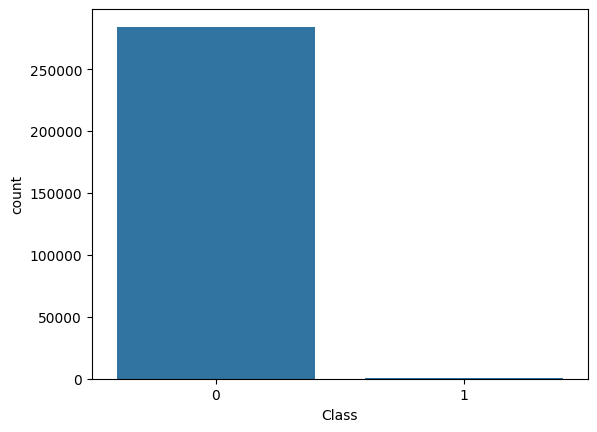

In [ ]:
sns.countplot(x=y);

# Training Classifiers with Imbalance Data (Base Models)

In [ ]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y==1,
                                                stratify=y,
                                                test_size=0.2,
                                                random_state=42)
print(y_dev.value_counts(normalize=True))
print('----------------------------')
print(y_test.value_counts(normalize=True))

False    0.998271
True     0.001729
Name: Class, dtype: float64
----------------------------
False    0.99828
True     0.00172
Name: Class, dtype: float64


In [ ]:
scores_lr = cross_validate(LogisticRegression(max_iter=1000),
                       X_dev, y_dev, cv=10,
                       scoring=['roc_auc', 'average_precision'])
scores_lr['test_roc_auc'].mean(), scores_lr['test_average_precision'].mean()

(0.9453090372511017, 0.6642549995799166)

In [ ]:
scores_dt = cross_validate(DecisionTreeClassifier(random_state=42, max_features='sqrt'),
                       X_dev, y_dev, cv=10,
                       scoring=['roc_auc', 'average_precision'])
scores_dt['test_roc_auc'].mean(), scores_dt['test_average_precision'].mean()

(0.8676849244813848, 0.5260518443413607)

In [ ]:
scores_rf = cross_validate(RandomForestClassifier(n_jobs=-1),
                       X_dev, y_dev, cv=10,
                       scoring=['roc_auc', 'average_precision'])
scores_rf['test_roc_auc'].mean(), scores_rf['test_average_precision'].mean()

(0.9525537978590419, 0.845398000632916)

In [ ]:
scores_hg = cross_validate(HistGradientBoostingClassifier(),
                       X_dev, y_dev, cv=10,
                       scoring=['roc_auc', 'average_precision'])
scores_hg['test_roc_auc'].mean(), scores_hg['test_average_precision'].mean()

(0.3223840283874121, 0.2044709987479742)

In [ ]:
scores_ad = cross_validate(AdaBoostClassifier(),
                       X_dev, y_dev, cv=10,
                       scoring=['roc_auc', 'average_precision'])
scores_ad['test_roc_auc'].mean(), scores_ad['test_average_precision'].mean()

(0.9724085044507339, 0.7641325173213567)

# Adding Class Weights

In [ ]:
scores_w_lr = cross_validate(LogisticRegression(class_weight='balanced', max_iter=1000),
                       X_dev, y_dev, cv=10,
                       scoring=['roc_auc', 'average_precision'])
scores_w_lr['test_roc_auc'].mean(), scores_w_lr['test_average_precision'].mean()

(0.9669139578898548, 0.7248555413518221)

In [ ]:
scores_w_rf = cross_validate(RandomForestClassifier(class_weight='balanced', n_jobs=-1),
                       X_dev, y_dev, cv=10,
                       scoring=['roc_auc', 'average_precision'])
scores_w_rf['test_roc_auc'].mean(), scores_w_rf['test_average_precision'].mean()

(0.9516559453028078, 0.8498704459038645)

# Training Classifiers with Imbalance Data - Random Undersampling

In [ ]:
rus = RandomUnderSampler(replacement=False)
X_dev_subsample, y_dev_subsample = rus.fit_resample(X_dev, y_dev)
print(X_dev.shape)
print(X_dev_subsample.shape)
y_dev_subsample.value_counts()

(227845, 30)
(788, 30)


False    394
True     394
Name: Class, dtype: int64

In [ ]:
rus = RandomUnderSampler(replacement=False, random_state=42)
simple_pipe_rus_lr = make_pipeline(rus, LogisticRegression(max_iter=1000))
scores_rus_lr = cross_validate(simple_pipe_rus_lr, X_dev, y_dev, cv=10,
                       scoring=['roc_auc','average_precision'])
scores_rus_lr['test_roc_auc'].mean(), scores_rus_lr['test_average_precision'].mean()

(0.9724307371877249, 0.7029479444054704)

In [ ]:
rus = RandomUnderSampler(replacement=False, random_state=42)
simple_pipe_rus_dt = make_pipeline(rus, DecisionTreeClassifier(random_state=42, max_features='sqrt'))
scores_rus_dt = cross_validate(simple_pipe_rus_dt, X_dev, y_dev, cv=10,
                       scoring=['roc_auc','average_precision'])
scores_rus_dt['test_roc_auc'].mean(), scores_rus_dt['test_average_precision'].mean()

(0.8973912765713813, 0.012736646096129728)

In [ ]:
rus = RandomUnderSampler(replacement=False, random_state=42)
simple_pipe_rus_rf = make_pipeline(rus, RandomForestClassifier(n_jobs=-1))
scores_rus_rf = cross_validate(simple_pipe_rus_rf, X_dev, y_dev, cv=10,
                       scoring=['roc_auc','average_precision'])
scores_rus_rf['test_roc_auc'].mean(), scores_rus_rf['test_average_precision'].mean()

(0.9819374419370643, 0.7322600455946322)

In [ ]:
rus = RandomUnderSampler(replacement=False, random_state=42)
simple_pipe_rus_hg = make_pipeline(rus, HistGradientBoostingClassifier())
scores_rus_hg = cross_validate(simple_pipe_rus_hg, X_dev, y_dev, cv=10,
                       scoring=['roc_auc','average_precision'])
scores_rus_hg['test_roc_auc'].mean(), scores_rus_hg['test_average_precision'].mean()

(0.9816861936561686, 0.6989427649092232)

In [ ]:
rus = RandomUnderSampler(replacement=False, random_state=42)
simple_pipe_rus_ad = make_pipeline(rus, AdaBoostClassifier())
scores_rus_ad = cross_validate(simple_pipe_rus_ad, X_dev, y_dev, cv=10,
                       scoring=['roc_auc','average_precision'])
scores_rus_ad['test_roc_auc'].mean(), scores_rus_ad['test_average_precision'].mean()

(0.9714908357194852, 0.37372261248007044)

# Training Classifiers with Imbalance Data - Random Oversampling

In [ ]:
ros = RandomOverSampler()
X_dev_oversample, y_dev_oversample = ros.fit_resample(X_dev, y_dev)
print(X_dev.shape)
print(X_dev_oversample.shape)
y_dev_oversample.value_counts()

(227845, 30)
(454902, 30)


False    227451
True     227451
Name: Class, dtype: int64

In [ ]:
ros = RandomOverSampler()
simple_pipe_ros_lr = make_pipeline(ros, LogisticRegression(max_iter=1000))
scores_ros_lr = cross_validate(simple_pipe_ros_lr, X_dev, y_dev, cv=10,
                       scoring=['roc_auc','average_precision'])
scores_ros_lr['test_roc_auc'].mean(), scores_ros_lr['test_average_precision'].mean()

(0.9702281500493735, 0.7190008593940649)

In [ ]:
ros = RandomOverSampler()
simple_pipe_ros_dt = make_pipeline(ros, DecisionTreeClassifier(random_state=42, max_features='sqrt'))
scores_ros_dt = cross_validate(simple_pipe_ros_dt, X_dev, y_dev, cv=10,
                       scoring=['roc_auc','average_precision'])
scores_ros_dt['test_roc_auc'].mean(), scores_ros_dt['test_average_precision'].mean()

(0.8626116761966809, 0.5501510734289319)

In [ ]:
ros = RandomOverSampler()
simple_pipe_ros_rf = make_pipeline(ros, RandomForestClassifier(n_jobs=-1))
scores_ros_rf = cross_validate(simple_pipe_ros_rf, X_dev, y_dev, cv=10,
                       scoring=['roc_auc','average_precision'])
scores_ros_rf['test_roc_auc'].mean(), scores_ros_rf['test_average_precision'].mean()

(0.9550473497908024, 0.8461612982853012)

In [ ]:
ros = RandomOverSampler()
simple_pipe_ros_hg = make_pipeline(ros, HistGradientBoostingClassifier())
scores_ros_hg = cross_validate(simple_pipe_ros_hg, X_dev, y_dev, cv=10,
                       scoring=['roc_auc','average_precision'])
scores_ros_hg['test_roc_auc'].mean(), scores_ros_hg['test_average_precision'].mean()

(0.9758966128783471, 0.8323803415738187)

In [ ]:
ros = RandomOverSampler()
simple_pipe_ros_ad = make_pipeline(ros, AdaBoostClassifier())
scores_ros_ad = cross_validate(simple_pipe_ros_ad, X_dev, y_dev, cv=10,
                       scoring=['roc_auc','average_precision'])
scores_ros_ad['test_roc_auc'].mean(), scores_ros_ad['test_average_precision'].mean()

(0.9751957186552959, 0.7864440884783768)

# Ensemble Resampling

In [ ]:
tree = DecisionTreeClassifier(random_state=42, max_features='sqrt')
resampled_bagging = BalancedBaggingClassifier(estimator=tree, random_state=42)
scores_er = cross_validate(resampled_bagging,
                        X_dev, y_dev, cv=10,
                        scoring=['roc_auc', 'average_precision'])
scores_er['test_roc_auc'].mean(), scores_er['test_average_precision'].mean()

(0.9719517690154429, 0.6440598336988304)

In [ ]:
resampled_rf = BalancedBaggingClassifier(random_state=42)
scores = cross_validate(resampled_rf, X_dev, y_dev, cv=10,
                       scoring=['roc_auc', 'average_precision'])
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.9757001444589525, 0.4864020470645219)

# Synthetic Minority Oversampling Technique (SMOTE) - Example

In [ ]:
smote = SMOTE(random_state=42)
simple_pipe_smo_lr = make_pipeline(smote, LogisticRegression(max_iter=1000))
scores_smo_lr = cross_validate(simple_pipe_smo_lr, X_dev, y_dev, cv=10,
                        scoring=['roc_auc', 'average_precision'])
scores_smo_lr['test_roc_auc'].mean(), scores_smo_lr['test_average_precision'].mean()

(0.963565400463491, 0.7347349110180021)

In [ ]:
smote = SMOTE(random_state=42)
simple_pipe_smo_dt = make_pipeline(smote, DecisionTreeClassifier(random_state=42, max_features='sqrt'))
scores_smo_dt = cross_validate(simple_pipe_smo_dt, X_dev, y_dev, cv=10,
                        scoring=['roc_auc', 'average_precision'])
scores_smo_dt['test_roc_auc'].mean(), scores_smo_dt['test_average_precision'].mean()

(0.8845151557046073, 0.30093818313413256)

In [ ]:
smote = SMOTE(random_state=42)
simple_pipe_smo_rf = make_pipeline(smote, RandomForestClassifier(n_jobs=-1))
scores_smo_rf = cross_validate(simple_pipe_smo_rf, X_dev, y_dev, cv=10,
                        scoring=['roc_auc', 'average_precision'])
scores_smo_rf['test_roc_auc'].mean(), scores_smo_rf['test_average_precision'].mean()

In [ ]:
smote = SMOTE(random_state=42)
simple_pipe_smo_hg = make_pipeline(smote, HistGradientBoostingClassifier())
scores_smo_hg = cross_validate(simple_pipe_smo_hg, X_dev, y_dev, cv=10,
                        scoring=['roc_auc', 'average_precision'])
scores_smo_hg['test_roc_auc'].mean(), scores_smo_hg['test_average_precision'].mean()

(0.9723608439860406, 0.8065863991896676)

In [ ]:
smote = SMOTE(random_state=42)
simple_pipe_smo_ad = make_pipeline(smote, AdaBoostClassifier())
scores_smo_ad = cross_validate(simple_pipe_smo_hg, X_dev, y_dev, cv=10,
                        scoring=['roc_auc', 'average_precision'])
scores_smo_ad['test_roc_auc'].mean(), scores_smo_ad['test_average_precision'].mean()

(0.9639526035218955, 0.7801481021264699)

# Visualization for Random Forests

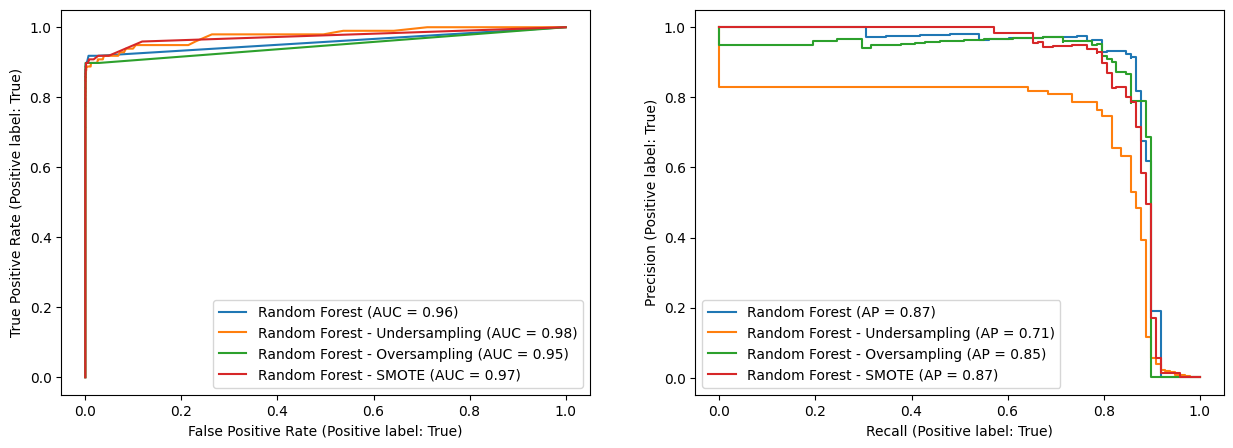

In [ ]:
model_1 = RandomForestClassifier().fit(X_dev, y_dev)
y_pred_prob_1 = model_1.predict_proba(X_test)[:,1]

rus = RandomUnderSampler(replacement=False, random_state=42)
model_2 = make_pipeline(rus, RandomForestClassifier())
model_2.fit(X_dev, y_dev)
y_pred_prob_2 = model_2.predict_proba(X_test)[:,1]

rus = RandomOverSampler()
model_3 = make_pipeline(rus, RandomForestClassifier())
model_3.fit(X_dev, y_dev)
y_pred_prob_3 = model_3.predict_proba(X_test)[:,1]

smote = SMOTE(random_state=42)
model_4 = make_pipeline(smote, RandomForestClassifier())
model_4.fit(X_dev, y_dev)
y_pred_prob_4 = model_4.predict_proba(X_test)[:,1]

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))

RocCurveDisplay.from_predictions(y_test, y_pred_prob_1, ax=ax[0],
                                 name="Random Forest", pos_label=True)
RocCurveDisplay.from_predictions(y_test, y_pred_prob_2, ax=ax[0],
                                 name="Random Forest - Undersampling", pos_label=True)
RocCurveDisplay.from_predictions(y_test, y_pred_prob_3, ax=ax[0],
                                 name="Random Forest - Oversampling", pos_label=True)
RocCurveDisplay.from_predictions(y_test, y_pred_prob_4, ax=ax[0],
                                 name="Random Forest - SMOTE", pos_label=True)


PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob_1, ax=ax[1],
                                        name="Random Forest", pos_label=True)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob_2, ax=ax[1],
                                        name='Random Forest - Undersampling',pos_label=True)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob_3, ax=ax[1],
                                        name='Random Forest - Oversampling',pos_label=True)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob_4, ax=ax[1],
                                        name='Random Forest - SMOTE',pos_label=True)
plt.show()

In [ ]:
model_1 = RandomForestClassifier().fit(X_dev, y_dev)
y_pred_prob_1 = model_1.predict_proba(X_test)[:,1]

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_1)
f1_scores = 2 * recall * precision / (recall + precision)
best_thresh = thresholds[np.argmax(f1_scores)]

In [ ]:
df = pd.DataFrame()
df['precision'] = precision[:-1]
df['recall'] = recall[:-1]
df['threshold'] = thresholds

df[df.loc[:, 'threshold'] == best_thresh]

,precision,recall,threshold
25,0.934066,0.867347,0.38


# Make Predictions

In [ ]:
y_pred = model_1.predict(X_test)
y_pred_new_threshold = (model_1.predict_proba(X_test)[:, 1] >= best_thresh).astype(int)


#  Evaluating

In [ ]:
# Evaluation metrics for default threshold
print("Evaluation metrics with threshold 0.5:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 score:", f1_score(y_test, y_pred))

Evaluation metrics with threshold 0.5:
Accuracy: 0.9995962220427653
Precision: 0.9411764705882353
Recall: 0.8163265306122449
F1 score: 0.8743169398907105


In [ ]:
# Evaluation metrics for new threshold
print(f"Evaluation metrics with threshold {best_thresh}:")
print("Accuracy:", accuracy_score(y_test, y_pred_new_threshold))
print("Precision:", precision_score(y_test, y_pred_new_threshold))
print("Recall:", recall_score(y_test, y_pred_new_threshold))
print("F1 score:", f1_score(y_test, y_pred_new_threshold))

Evaluation metrics with threshold 0.38:
Accuracy: 0.9996664442961974
Precision: 0.9340659340659341
Recall: 0.8673469387755102
F1 score: 0.8994708994708994
